## **Uvod**
Segmentacija fotografija je proces podele digitalnih slika na više segmenata ili regiona, pri čemu se svaki segment sastoji od piksela sa sličnim karakteristikama. Cilj segmentacije je olakšati analizu slika tako što se omogućava lociranje objekata i definisanje granica na fotografijama.
Precizna segmentacija fotografija predstavlja izazovnu zadatak koji ima veliki uticaj na uspešnost analize slika. Kvalitet i pouzdanost segmentacije igraju ključnu ulogu u daljim fazama analize, što omogućava pojednostavljenu obradu i interpretaciju rezultata.
Kako bi analiza fotografija bila efikasna, važno je da segmentacija bude tačna i pouzdana, jer to utiče na celokupnu analizu slike i olakšava sve dalje korake u procesu.
Zadatak koji je potrebno uraditi u okviru ovog projekta podrazumeva izgradnju modela koji bi prihvatao ulazne ultrazvučne slike vrata i identifikovao nervne strukture u ulaznom skupu fotografija. To bi poboljšalo postavljanje katetera i doprinelo budućnosti bez bolova. (1)
## **Segmentacija**
>### Metode segmentacije
>>U literaturi se mogu naći različite podele kada su u pitanju tehnike koje se primjenjuju pri segmentaciji slika. Međutim, kada se govori o osnovnoj podeli, izdvajaju se dve najčešće korišćene tehnike:
>>1.	Pronalaženje ivica – izdvajanje samo onih piksela koji pripadaju rubovima objekata i
>>2.	Izdvajanje regiona – izdvajanje celog objekta od pozadine pridružujući piksele čija je svetlost ispod nekog praga pozadini, a ostale objektu i obrnuto
>### Algoritmi i tehnike za segmentaciju
>>Postoje različite podele algoritama i tehnika za segmentaciju u zavisnosti od autora ali najveći broj njih vidi sledeće četiri tehnike koje se koriste:
>>1.	Segmentacija pragom (Thresholding)
>>2.	Segmentacija klasterizacijom (Clustering)
>>3.	Segmentacija regionom (Region)
>>4.	Segmentacija granicom regiona (Edge)

>>Segmentacija pragom je metoda koja se zasniva na poređenju osvetljenosti piksela sa jednim ili više pragova. Može se koristiti za odvajanje objekta od pozadine ako pozadina ima uniformnu osvetljenost ili boju koja se razlikuje od objekta. Segmentacija sa jednim pragom je najjednostavnija forma segmentacije, dok se segmentacija sa više pragova koristi kada imamo scene sa više različitih objekata. (2)

>>Segmentacija klasterizacijom je tehnika segmentacije koja se zasniva na grupisanju piksela u uzajamno isključive oblasti na osnovu njihovih karakteristika. Proces podrazumeva podelu prostora podataka u regione ili klastera, gde svaki klaster predstavlja grupu podataka koja se odnosi na jedan region slike. Ova metoda se koristi za segmentaciju slika na osnovu sličnosti vektora podataka koji opisuju piksele. Međutim, ova metoda ima visoku računsku složenost. (2)

>>Segmentacija regionom je grupa metoda koje izdvajaju homogena područja slike na osnovu karakteristika. Metode uključuju rast regiona, gde se susedni pikseli grupišu na osnovu sličnosti, i razdvajanje/spajanje regiona, gde se segmenti deluju i ponovo spajaju na osnovu uniformnosti. Metode segmentacije regionom se koriste za analizu slika, ali mogu imati vidljivu blokovsku strukturu i zahtevaju odabir odgovarajućih kriterijuma. (2)

>>Pri segmentaciji slika koje koriste ivice kao informaciju o granicama regiona, neophodno je primeniti postupak spajanja ivica kako bi se formirale neprekidne granice objekata. Metode spajanja ivica uključuju fitovanje krivih, heurističke metode i Hafovu transformaciju. Ove metode se koriste za rekonstrukciju prekinutih segmenata granica, formiranje neprekidnih granica na osnovu gradijentne slike ili identifikaciju i spajanje tačaka na ivicama koje pripadaju istom regionu. Odabir odgovarajuće metode zavisi od složenosti granica, vrste slike i zahteva segmentacije. (2)
## **Struktura dataset-a**
*	/train/ sadrži slike skupa za obuku, imenovane prema predmetu_imageNum.tif. Svaka slika sa istim brojem predmeta dolazi od iste osobe. Ovaj folder takođe uključuje slike binarne maske koje prikazuju segmentacije krvnog pritiska.
*	/test/ sadrži slike testnog skupa, imenovane prema imageNum.tif. Morate predvideti segmentaciju krvnog pritiska za ove slike i nije im dati broj predmeta. Nema preklapanja između predmeta u setu za obuku i testu.
*	train_masks.csv daje maske slike za obuku u kodiranom formatu. Ovo je obezbeđeno kao pogodnost da se pokaže kako se maske slika pretvaraju u vrednosti kodiranog teksta za podnošenje.
*	sample_submission.csv prikazuje ispravan format datoteke za slanje.

## **Mrežna arhitektura**
>Budući da je problem segmentacije slike, pri čemu ga samo klasifikovanje slike ne bi rešilo, ali bi segmentiranje unutar slike trebalo da pomogne. Prema tome, potrebno je izvršiti povećanje uzorkovanja CNN izlaza da bi se proizvela maska verovatnoće. U-Net kovoluciona neuronska mreža koja obezbeđuje brzu i preciznu semantičku segmentaciju slika. Njena arhitektura može se posmatrati kao mreža enkodera koju prati mreža dekodera. Za razliku od klasifikacije gde je krajnji rezultat mreže jedina važna stvar, semantička segmentacija ne zahteva samo diskriminaciju na nivou piksela već i mehanizam za projektovanje diskriminativnih karakteristika naučenih u različitim fazama enkodera na prostor piksela. Dakle, U-Net se može koristiti.
>U-Net ima dva puta - putanju kontrakcije i putanju proširenja. Putanja kontrakcije izdvaja kontekst slike i na taj način slika se uzorkuje. Zatim, putanja proširenja povećava uzorkovanje slike i daje masku verovatnoće iste veličine kao i ulazna slika. (3)


 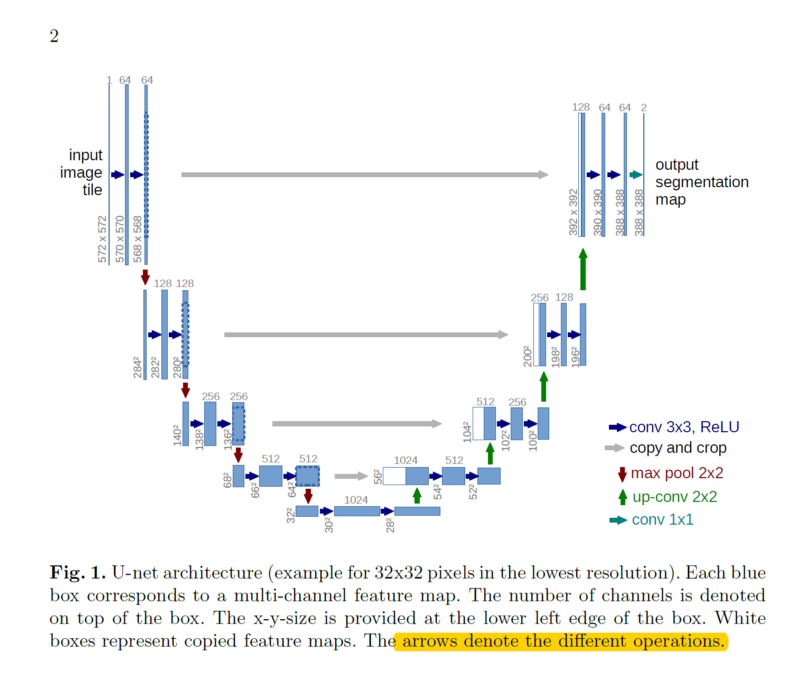

## **Trening**
*	Slike se obrađuju i menjaju na (128, 128).
*	Model je sastavljen korišćenjem Adamovog optimizatora, binarne krosentropije kao gubitka i tačnosti kao metrike.

>>Adamova optimizacija je metoda stohastičkog gradijenta spuštanja koja se zasniva na adaptivnoj proceni momenata prvog i drugog reda. Prema Kingma et al., 2014, metoda je „računarski efikasna, ima male potrebe za memorijom, invarijantna je u odnosu na dijagonalno skaliranje gradijenata i dobro je pogodna za probleme koji su veliki u smislu podataka/parametara“. (4)

>>Binarna unakrsna entropija (takođe poznata kao logaritamski gubitak ili gubitak dnevnika) je metrika modela koja prati netačno označavanje klase podataka od strane modela, kažnjavajući model ako dođe do odstupanja u verovatnoći u klasifikaciji oznaka. Niske vrednosti gubitaka dnevnika jednake su visokim vrednostima tačnosti. (5)

>>Tačnost klasifikacije je ono što obično mislimo kada koristimo izraz tačnost. To je odnos broja tačnih predviđanja i ukupnog broja ulaznih uzoraka. Dobro funkcioniše samo ako postoji jednak broj uzoraka koji pripadaju svakoj klasi. Na primer, uzmite u obzir da u našem skupu za obuku postoji 98% uzoraka klase A i 2% uzoraka klase B. Tada naš model može lako dobiti 98% tačnosti treninga jednostavnim predviđanjem svakog uzorka obuke koji pripada klasi A. Kada se isti model testira na test setu sa 60% uzoraka klase A i 40% uzoraka klase B, tada bi tačnost testa pala na 60%. Preciznost klasifikacije je odlična, ali nam daje lažni osećaj postizanja visoke tačnosti.Pravi problem nastaje kada su troškovi pogrešne klasifikacije uzoraka manje klase veoma visoki. Ako imamo posla sa retkom, ali fatalnom bolešću, cena neuspeha da se dijagnostikuje bolest bolesne osobe je mnogo veća od cene slanja zdrave osobe na više testova. (6)

* Model je obučen za 50 epoha sa ranim zaustavljanjem, u slučaju da se gubitak validacije ne smanji dalje.
* Tačnost od oko 98% postiže se modelom na skupu testnih podataka.

## Reference
1. What is segmentation in machine learning. deepchecks. [Online] 06 2019. [Cited: 07 04, 2023.] https://deepchecks.com/glossary/segmentation-in-machine-learning/.
2. Image Segmentation. datagen.tech. [Online] 04 2017. [Cited: 07 04, 2023.] https://datagen.tech/guides/image-annotation/image-segmentation/.
3. U-Net: Convolutional Networks for Biomedical Image Segmentation. https://lmb.informatik.uni-freiburg.de/. [Online] 2015. [Cited: 07 04, 2023.] https://lmb.informatik.uni-freiburg.de/people/ronneber/u-net/.
4. Adam. keras.io. [Online] 04 2015. [Cited: 07 04, 2023.] https://keras.io/api/optimizers/adam/.
5. Roberts, Amber. Binary Cross Entropy: Where To Use Log Loss In Model Monitoring. arize.com. [Online] 01 01, 2023. [Cited: 07 04, 2023.] https://arize.com/blog-course/binary-cross-entropy-log-loss/.
6. Mishra, Aditya. Metrics to Evaluate your Machine Learning Algorithm. towardsdatascience.com. [Online] 02 24, 2018. [Cited: 07 04, 2023.] https://towardsdatascience.com/metrics-to-evaluate-your-machine-learning-algorithm-f10ba6e38234.




In [ ]:
Importovanje biblioteke potrebne za rad

In [ ]:
import tensorflow as tf

Funkcija Conv2D_Block predstavlja blok konvolucijskih slojeva u dubokoj neuronskoj mreži za obradu slika. Prvo se primenjuje konvolucijski sloj, nakon čega sledi grupna normalizacija, aktivaciona funkcija ReLU, potom ponovni konvolucijski sloj, ponovna grupna normalizacija i još jednom aktivaciona funkcija ReLU. Na kraju se dobija izlazni tenzor. Ovaj blok omogućava izdvajanje složenijih karakteristika iz ulaznih slika.

In [ ]:
def Conv2D_Block(input_tensor , n_filters):
  x = tf.keras.layers.Conv2D(filters = n_filters , kernel_size = (3 , 3) , kernel_initializer = 'he_normal' , padding = 'same')(input_tensor)
  x = tf.keras.layers.BatchNormalization()(x)
  x = tf.keras.layers.Activation('relu')(x)

  x = tf.keras.layers.Conv2D(filters = n_filters , kernel_size = (3 , 3) , kernel_initializer = 'he_normal' , padding = 'same')(x)
  x = tf.keras.layers.BatchNormalization()(x)
  x = tf.keras.layers.Activation('relu')(x)

  return x

Kod ispod implementira U-Net arhitekturu za segmentaciju slika. Arhitektura se sastoji od "ulaznog puta" i "izlaznog puta". Ulazni put smanjuje dimenzionalnost slike koristeći konvolucijske blokove, grupnu normalizaciju i aktivacionu funkciju ReLU. Izlazni put koristi konvolucione slojeve za povećanje dimenzionalnosti slike, kombinujući ih sa odgovarajućim slojevima iz ulaznog puta. Na kraju, koristi se konvolucioni sloj sa sigmoidnom aktivacionom funkcijom za dobijanje izlaznog tenzora. Funkcija U_Net vraća model U-Net za obuku ili predikciju na slikama.

In [ ]:
def U_Net(img_tensor , n_filters = 16):
  conv1 = Conv2D_Block(img_tensor , n_filters * 1)
  pool1 = tf.keras.layers.MaxPooling2D((2 , 2))(conv1)
  pool1 = tf.keras.layers.Dropout(0.05)(pool1)

  conv2 = Conv2D_Block(pool1 , n_filters * 2)
  pool2 = tf.keras.layers.MaxPooling2D((2 , 2))(conv2)
  pool2 = tf.keras.layers.Dropout(0.05)(pool2)

  conv3 = Conv2D_Block(pool2 , n_filters * 4)
  pool3 = tf.keras.layers.MaxPooling2D((2 , 2))(conv3)
  pool3 = tf.keras.layers.Dropout(0.05)(pool3)

  conv4 = Conv2D_Block(pool3 , n_filters * 8)
  pool4 = tf.keras.layers.MaxPooling2D((2 , 2))(conv4)
  pool4 = tf.keras.layers.Dropout(0.05)(pool4)

  conv5 = Conv2D_Block(pool4 , n_filters * 16)

  pool6 = tf.keras.layers.Conv2DTranspose(n_filters * 8 , (3 , 3) , (2, 2) , padding = 'same')(conv5)
  pool6 = tf.keras.layers.concatenate([pool6 , conv4])
  pool6 = tf.keras.layers.Dropout(0.05)(pool6)
  conv6 = Conv2D_Block(pool6 , n_filters * 8)

  pool7 = tf.keras.layers.Conv2DTranspose(n_filters * 4 , (3 , 3) , (2 , 2) , padding = 'same')(conv6)
  pool7 = tf.keras.layers.concatenate([pool7 , conv3])
  pool7 = tf.keras.layers.Dropout(0.05)(pool7)
  conv7 = Conv2D_Block(pool7 , n_filters * 4)

  pool8 = tf.keras.layers.Conv2DTranspose(n_filters * 2 , (3 , 3) , (2 , 2) , padding = 'same')(conv7)
  pool8 = tf.keras.layers.concatenate([pool8 , conv2])
  pool8 = tf.keras.layers.Dropout(0.05)(pool8)
  conv8 = Conv2D_Block(pool8 , n_filters * 2)

  pool9 = tf.keras.layers.Conv2DTranspose(n_filters * 1 , (3 , 3) , (2 , 2) , padding = 'same')(conv8)
  pool9 = tf.keras.layers.concatenate([pool9 , conv1])
  pool9 = tf.keras.layers.Dropout(0.05)(pool9)
  conv9 = Conv2D_Block(pool9 , n_filters * 1)

  output = tf.keras.layers.Conv2D(1 , (1 , 1) , activation = 'sigmoid')(conv9)

  u_net = tf.keras.Model(inputs = [img_tensor] , outputs = [output])

  return u_net

In [ ]:
import pandas as pd

Naredna ćelija pokrenuta je nekoliko puta kako bi se uvezli svi fajlovi neophodni za dalji rad. Nakon nje su slike uvežene u radno okruženje.

In [ ]:
from google.colab import files
files.upload()

U kodu ispod vrši se čitanje sadržaja CSV datoteke 'train_masks.csv' i smeštanje u DataFrame objekat d. Nakon izvršavanja ove linije koda, možemo pristupiti i manipulisati podacima iz d.

In [ ]:
d = pd.read_csv('train_masks.csv')

Iščitavanje nekoliko početnih redova iz DataFrame objekat d.

In [ ]:
d.head()

,subject,img,pixels
0,1,1,168153 9 168570 15 168984 22 169401 26 169818 ...
1,1,2,96346 7 96762 16 97179 27 97595 35 98012 40 98...
2,1,3,121957 2 122365 26 122784 28 123202 31 123618 ...
3,1,4,110980 9 111393 21 111810 33 112228 43 112647 ...
4,1,5,NaN


In [ ]:
import os
import re

listdir metoda (iz os modula koji obezbeđuje funkcije za intereakciju sa operativnim sistemom) vraca nazive fotografija koje se nalaze u okviru direktorijuma koji je prosleđen kao parametar metode. Nakon toga se ispisuje broj elemenata koji se nalaze u direktorijumima /content/train/ i /content/test/.

In [ ]:
train_path = os.listdir('/content/train/')
test_path = os.listdir('/content/test/')

print(len(train_path) , len(test_path))

2156 915


Kod u narednoj ćeliji se koristi za sortiranje liste train_path prema brojevima koji se nalaze u imenima datoteka.

In [ ]:
reg = re.compile("[0-9]+")

temp1 = list(map(lambda x: reg.match(x).group(), train_path))
temp1 = list(map(int, temp1))

temp2 = list(map(lambda x: reg.match(x.split("_")[1]).group(), train_path))
temp2 = list(map(int, temp2))

train_path = [x for _,_,x in sorted(zip(temp1, temp2, train_path))]
train_path[:20]

['1_1.tif',
 '1_1_mask.tif',
 '1_2.tif',
 '1_2_mask.tif',
 '1_3.tif',
 '1_3_mask.tif',
 '1_4.tif',
 '1_4_mask.tif',
 '1_5.tif',
 '1_5_mask.tif',
 '1_6.tif',
 '1_6_mask.tif',
 '1_7.tif',
 '1_7_mask.tif',
 '1_8.tif',
 '1_8_mask.tif',
 '1_9.tif',
 '1_9_mask.tif',
 '1_10.tif',
 '1_10_mask.tif']

In [ ]:
len(train_path)

2156

Naredna ćelija deli listu train_path na dve liste: train_image i train_mask. Ova struktura omogućava povezivanje ulaznih slika i odgovarajućih slika maski za obuku ili dalju obradu u neuronskoj mreži.

In [ ]:
train_image = []
train_mask = []

for index , item in enumerate(train_path):
  if index % 2 == 0:
    train_image.append(item)
  else:
    train_mask.append(item)

In [ ]:
print(len(train_image))
print(len(train_mask))

1078
1078


In [ ]:
import matplotlib.pyplot as plt
import random
from PIL import Image
import numpy as np
import skimage

Upotreba biblioteke Matplotlib za vizualizaciju podataka. Konkretno,prikazivanje nasumično odabranih ulaznih slika i njihovih odgovarajućih maski za vizuelni prikaz i razumevanje podataka pre obrade ili obuke neuronske mreže.

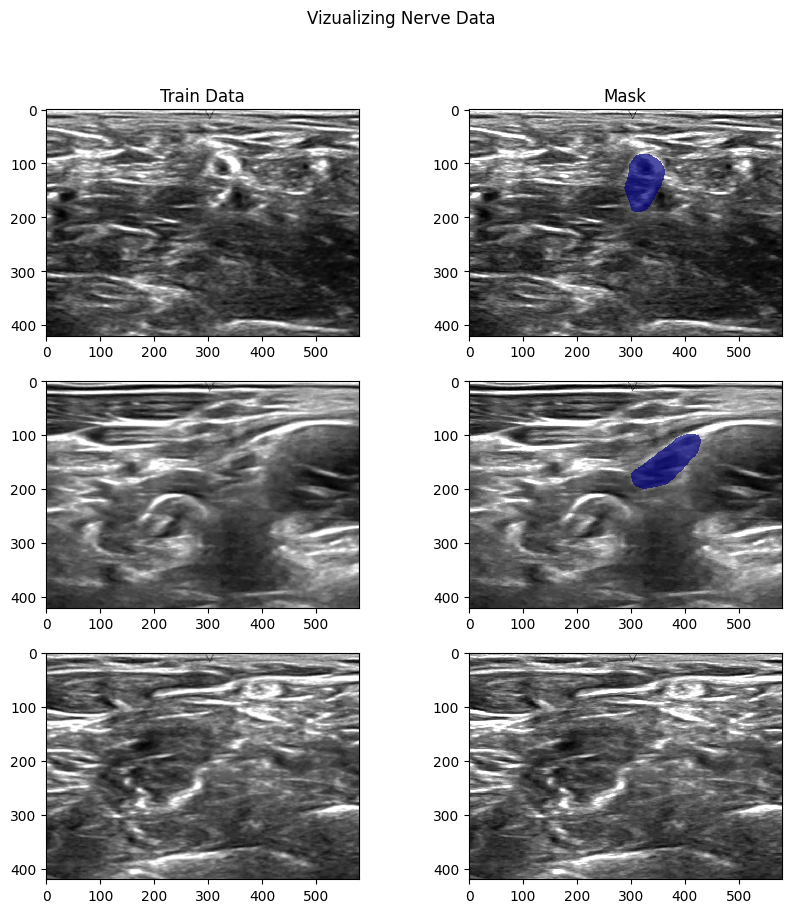

In [ ]:
fig , ax = plt.subplots(3 , 2 , figsize=[10 , 10])
fig.suptitle('Vizualizing Nerve Data')
ax[0 , 0].set_title('Train Data')
ax[0 , 1].set_title('Mask')

# print(ax.shape)
for i in range(0 , 3):
  ind = random.randint(0 , len(train_image))
  img1 = np.array(Image.open("/content/train/" + str(train_image[ind])))
  ax[i , 0].imshow(img1 , cmap = 'gray')

  img2 = np.array(Image.open("/content/train/" + str(train_mask[ind])))
  img2 = np.ma.masked_where(img2 == 0, img2)
  ax[i , 1].imshow(img1 , cmap = 'gray' , interpolation = 'none')
  ax[i , 1].imshow(img2 , cmap = 'jet', interpolation = 'none', alpha = 0.7)

plt.show()

Naredni korak je da se kreiraju matrice X i y sa odgovarajućim dimenzijama (inicijalizujemo ih nulama). Ove matrice će se koristiti za čuvanje ulaznih slika i njihovih odgovarajućih maski u obliku tenzora tokom dalje obrade ili obuke neuronske mreže.

In [ ]:
X = np.zeros((len(train_image), 128, 128, 1), dtype=np.float32)
y = np.zeros((len(train_image), 128, 128, 1), dtype=np.float32)

Sledeća ćelija sadrži kod za pretprocesiranje ulaznih slika i maski kako bi se pripremile za dalju upotrebu u neuronskoj mreži. Slike se skaliraju na dimenzije 128x128 i normalizuju na opseg od 0 do 1, čime se olakšava obuka modela.

In [ ]:
for n , img_name in enumerate(train_image):
  img = tf.keras.preprocessing.image.load_img('/content/train/'+img_name , grayscale=True)
  in_img = tf.keras.preprocessing.image.img_to_array(img)
  in_img = skimage.transform.resize(in_img , (128 , 128 , 1) , mode = 'constant' , preserve_range = True)
  X[n] = in_img / 255.0

for n , img_name in enumerate(train_mask):
  img = tf.keras.preprocessing.image.load_img('/content/train/'+img_name , grayscale=True)
  in_img = tf.keras.preprocessing.image.img_to_array(img)
  in_img = skimage.transform.resize(in_img , (128 , 128 , 1) , mode = 'constant' , preserve_range = True)
  y[n] = in_img / 255.0

/usr/local/lib/python3.10/dist-packages/keras/utils/image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


Ovaj deo koda koristi funkciju train_test_split iz biblioteke
 sklearn.model_selection za podelu podataka na trening i validacioni skup. Kao rezultat dobijamo X_train i y_train koji sadrže podatke koji će se koristiti za trening modela i X_valid i y_valid koji sadrže podatke koji će se koristiti za evaluaciju (validaciju) modela tokom obuke.

In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_valid , y_train , y_valid = train_test_split(X , y , test_size = 0.1 , random_state = 42)

U nastavku se definiše ulazni tenzor za model neuronske mreže, kreira se sam model pomoću funkcije U_Net, i konfiguriše postupak obuke. Ulazni tenzor se definiše sa dimenzijama (128, 128, 1) koje odgovaraju dimenzijama ulaznih slika. Zatim se model kreira koristeći upravo taj ulazni tenzor. Nakon toga, postupak obuke se konfiguriše sa odabranim optimizerom, gubitkom i metrikom. Time je model spreman za obuku na trening podacima i evaluaciju na validacionom skupu.

In [ ]:
img_tensor = tf.keras.layers.Input((128 , 128 , 1) , name = 'img')
model = U_Net(img_tensor)
model.compile(optimizer = tf.keras.optimizers.Adam(),
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

Sažeti prikaz modela

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 img (InputLayer)               [(None, 128, 128, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 128, 128, 16  160         ['img[0][0]']                    
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 128, 128, 16  64         ['conv2d[0][0]']                 
 alization)                     )                                                             

Definise se lista povratnih poziva koji će se koristit tokom obuke modela. Ovi povratni pozivi su korisni za praćenje obuke modela i primenu odgovarajućih akcija kao što su zaustavljanje obuke, smanjenje stope učenja ili čuvanje najboljeg modela.

In [ ]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=10, verbose=1),
    tf.keras.callbacks.ReduceLROnPlateau(factor=0.1, patience=5, min_lr=0.00001, verbose=1),
    tf.keras.callbacks.ModelCheckpoint('model_nerve.h5', verbose=1, save_best_only=True, save_weights_only=True)
]

Kod u nastavku je namenjen za pokretanje obuke modela. Sama metoda model.fit() je ona koja pokreće obuku modela.
X_train i y_train su ulazni podaci za trening, dok su X_valid i y_valid ulazni podaci za validaciju. batch_size=32 određuje broj uzoraka koji će se koristiti u svakoj iteraciji obuke. epochs=50 specificira broj epoha, odnosno koliko puta će se celokupan skup podataka proći kroz model tokom obuke. callbacks=callbacks koristi listu povratnih poziva (callbacks) koja je definisana ranije, kako bi se primenile odgovarajuće akcije tokom obuke.
Nakon izvršavanja ovog koda, model će biti obučen na trening podacima i evaluiran na validacionom skupu. Rezultati obuke će biti sačuvani u promenljivoj results.

In [ ]:
results = model.fit(X_train, y_train, batch_size=32, epochs=50, callbacks=callbacks,\
                    validation_data=(X_valid, y_valid))

Epoch 1/50
30/31 [============================>.] - ETA: 0s - loss: 0.0165 - accuracy: 0.9911
Epoch 1: val_loss did not improve from 0.03536
31/31 [==============================] - 4s 127ms/step - loss: 0.0165 - accuracy: 0.9910 - val_loss: 0.0365 - val_accuracy: 0.9856 - lr: 1.0000e-05
Epoch 2/50
30/31 [============================>.] - ETA: 0s - loss: 0.0164 - accuracy: 0.9911
Epoch 2: val_loss did not improve from 0.03536
31/31 [==============================] - 4s 124ms/step - loss: 0.0164 - accuracy: 0.9911 - val_loss: 0.0363 - val_accuracy: 0.9856 - lr: 1.0000e-05
Epoch 3/50
30/31 [============================>.] - ETA: 0s - loss: 0.0164 - accuracy: 0.9910
Epoch 3: val_loss did not improve from 0.03536
31/31 [==============================] - 4s 122ms/step - loss: 0.0164 - accuracy: 0.9910 - val_loss: 0.0363 - val_accuracy: 0.9855 - lr: 1.0000e-05
Epoch 4/50
30/31 [============================>.] - ETA: 0s - loss: 0.0164 - accuracy: 0.9911
Epoch 4: val_loss did not improve from 

Naredna ćelija generiše i prikazuje krivu učenja modela. Na grafikonu se prikazuju vrednosti gubitka (loss) vrednosti gubitka tokom svake epohe obuke. Tačka na grafikonu označava najmanji gubitak koji je postignut na validacionom skupu. Ova vizualizacija omogućava praćenje performansi modela tokom obuke i procenu kako se gubitak menja tokom vremena.

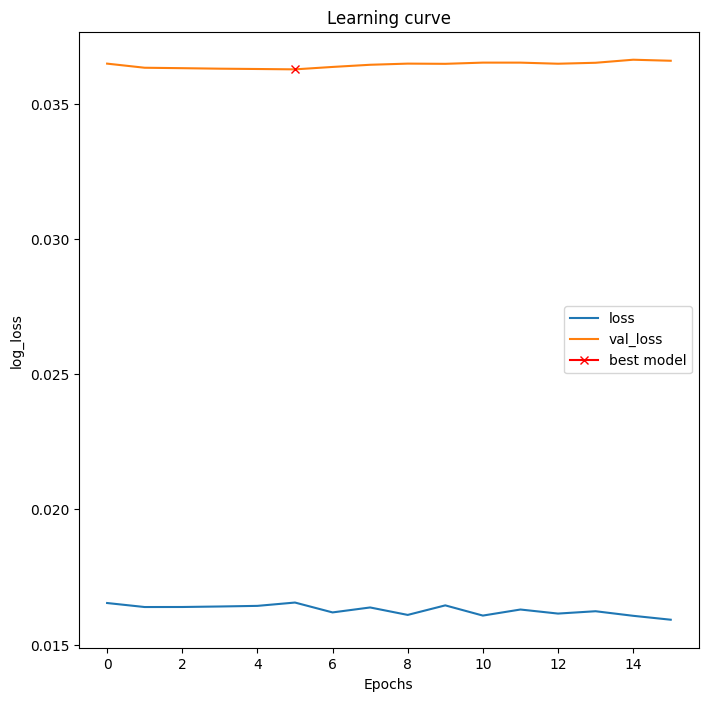

In [ ]:
plt.figure(figsize=(8, 8))
plt.title("Learning curve")
plt.plot(results.history["loss"], label="loss")
plt.plot(results.history["val_loss"], label="val_loss")
plt.plot( np.argmin(results.history["val_loss"]), np.min(results.history["val_loss"]), marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("log_loss")
plt.legend();

Naredna linija koda učitava težine modela koje su sačuvane u datoteci 'model_nerve.h5'. Učitavanje težina omogućava korišćenje prethodno obučenog modela za predviđanje ili dalju obuku bez potrebe za ponovnom obukom modela.

In [ ]:
model.load_weights('model_nerve.h5')

Ova linija koda izvršava evaluaciju modela na validacionim podacima. Metoda model.evaluate() izračunava gubitak (loss) i metrike modela na datim podacima.
X_valid predstavlja ulazne podatke za validaciju.
y_valid predstavlja ciljne vrednosti za validaciju.
verbose=1 služi da se ispisuje napredak evaluacije tokom izvršavanja.
Nakon izvršavanja ove linije koda, biće prikazani rezultati evaluacije modela, uključujući gubitak i druge definisane metrike, na validacionim podacima.

In [ ]:
model.evaluate(X_valid, y_valid, verbose=1)

4/4 [==============================] - 0s 36ms/step - loss: 0.0354 - accuracy: 0.9850


[0.03536373749375343, 0.9850124716758728]

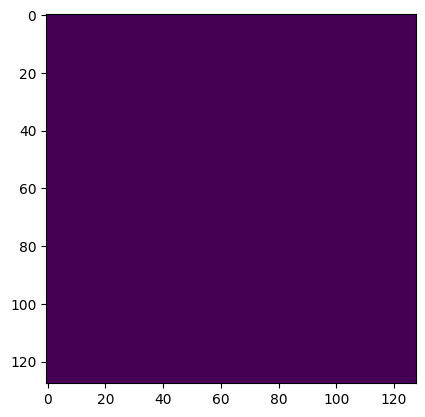

In [ ]:
plt.imshow(y_valid[0].squeeze())

U ovom delu koda se učitava slika pod nazivom '105.tif' iz direktorijuma '/content/test/'. Nakon učitavanja, slika se pretvara u grejskal format i konvertuje u numpy niz. Zatim se veličina slike menja na 128x128 piksela koristeći funkciju za promenu veličine slike. Da bi se slika prilagodila ulaznom obliku modela, dodaje se dodatna dimenzija (1). Nakon toga, slika se normalizuje skaliranjem vrednosti svih piksela na opseg od 0 do 1. Konačno, normalizovana slika se prikazuje na grafikonu.

/usr/local/lib/python3.10/dist-packages/keras/utils/image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


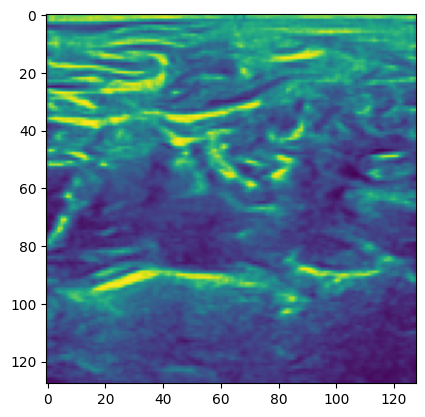

In [ ]:
img_name = '105.tif'
img = tf.keras.preprocessing.image.load_img('/content/test/'+img_name , grayscale=True)
in_img = tf.keras.preprocessing.image.img_to_array(img)
in_img = skimage.transform.resize(in_img , (128 , 128 , 1) , mode = 'constant' , preserve_range = True)
test = in_img / 255.0
plt.imshow(test.squeeze())

Naredna linija koda koristi model da izvrši predviđanje na test primeru test i daje rezultat predviđanja. np.expand_dims(test, 0) dodaje dodatnu dimenziju na početak niza test, kako bi se oblik prilagodio očekivanom obliku ulaza za model.

In [ ]:
prediction = model.predict(np.expand_dims(test , 0))

1/1 [==============================] - 1s 970ms/step


Prikaz oblika rezultata predviđanja (prediction). prediction.shape vraća tuple koji sadrži dimenzije rezultujućeg niza predviđanja. Ove dimenzije nam daju informaciju o broju primeraka, visini, širini i broju kanala predviđanja.

In [ ]:
prediction.shape

(1, 128, 128, 1)

Prikaz oblika rezultata predviđanja nakon primene squeeze() funkcije.

In [ ]:
prediction.squeeze().shape

(128, 128)

Ovaj deo koda prikazuje vizualizaciju rezultata predviđanja na testnom primeru.
fig, ax = plt.subplots(1, 2) kreira jednu figuru sa dve podfigure(slike).
.squeeze() uklanja suvišne dimenzije
ax[0].imshow(img1, cmap='gray') prikazuje testnu sliku u prvoj podfiguri koristeći colormap 'gray'.
Zatim se koristi imshow funkcija sa cmap parametrom postavljenim na 'jet' za prikazivanje predikcije u boji.
interpolation i alpha se koriste za podešavanje načina interpolacije i transparentnosti prikazane maske
plt.show() prikazuje celu figuru sa podfigurama.

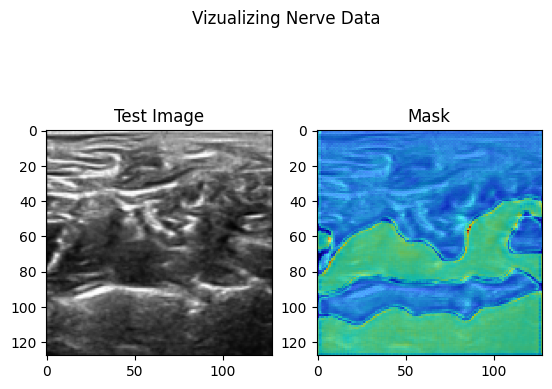

In [ ]:
fig , ax = plt.subplots(1 , 2)
fig.suptitle('Vizualizing Nerve Data')
ax[0].set_title('Test Image')
ax[1].set_title('Mask')
img1 = test.squeeze()
ax[0].imshow(img1 , cmap = 'gray')

img2 = prediction.squeeze()
img2 = np.ma.masked_where(img2 == 0, img2)
ax[1].imshow(img1 , cmap = 'gray' , interpolation = 'none')
ax[1].imshow(img2 , cmap = 'jet', interpolation = 'none', alpha = 0.7)

plt.show()